In [ ]:
import time
from collections import defaultdict

# --- 데이터 정의 (단계 1) ---
subway_lines = {
    '1': ["소요산","동두천","보산","동두천중앙","지행","덕정","덕계","양주","녹양","가능",
          "의정부","회룡","망월사","도봉산","도봉","방학","창동","녹천","월계","성북",
          "석계","신이문","외대앞","회기","청량리","제기동","신설동","동묘앞","동대문","종로5가",
          "종로3가","종각","시청","서울역","남영","용산","노량진","대방","신길","영등포",
          "신도림","구로", "가산디지털단지","독산","금천구청","석수","관악","안양","명학",
          "금정","군포","당정","의왕","성균관대","화서","수원","세류","병점","세마","오산대","오산","진위","송탄","서정리","지제","평택","성환","직산","두정",
          "천안","봉명","쌍용","아산","배방","온양온천","신창"],
    '1인천':["구로","구일","개봉","오류동","온수","역곡","소사","부천","중동",
            "송내","부개","부평","백운","동암","간석","주안","도화","제물포","도원","동인천","인천"],
    '1서동탄': ["병점","서동탄"],
    '1광명' : ["금천구청","광명"],
    '2': ["시청","을지로입구","을지로3가","을지로4가","동대문역사문화공원","신당","상왕십리",
          "왕십리","한양대","뚝섬","성수","건대입구","구의","강변","잠실나루","잠실","신천",
          "종합운동장","삼성","선릉","역삼","강남","교대","서초","방배","사당","낙성대","서울대입구",
          "봉천","신림","신대방","구로디지털단지","대림","신도림","문래","영등포구청","당산","합정",
          "홍대입구","신촌","이대","아현","충정로","시청"],
    '2신설동' : ["성수","용답","신답","용두","신설동"],
    '2까치산' : ["신도림","도림천","양천구청","신정네거리","까치산"],
    '3': ["대화","주엽","정발산","마두","백석","대곡","화정","원당","삼송","지축",
          "구파발","연신내","불광","녹번","홍제","무악재","독립문","경복궁","안국","종로3가",
          "을지로3가","충무로","동대입구","약수","금호","옥수","압구정","신사","잠원",
          "고속터미널","교대","남부터미널","양재","매봉","도곡","대치","학여울","대청",
          "일원","수서","가락시장","경찰병원","오금"],
    '4': ["진접","오남","별내별가람","당고개","상계","노원","창동","쌍문","수유","미아",
          "미아삼거리","길음","성신여대입구","한성대입구","혜화","동대문","동대문역사문화공원",
          "충무로","명동","회현","서울역","숙대입구","삼각지","신용산","이촌","동작","이수",
          "사당","남태령","선바위","경마공원","대공원","과천","정부과천청사","인덕원","평촌",
          "범계","금정","산본","수리산","대야미","반월","상록수","한대앞","중앙","고잔","공단",
          "안산","신길온천","정왕","오이도"],
    '5하남검단산': ["방화","개화산","김포공항","송정","마곡","발산","우장산","화곡","까치산","신정",
                  "목동","오목교","양평","영등포구청","영등포시장","신길","여의도","여의나루","마포",
                  "공덕","애오개","충정로","서대문","광화문","종로3가","을지로4가","동대문역사문화공원",
                  "청구","신금호","행당","왕십리","마장","답십리","장한평","군자","아차산","광나루",
                  "천호","강동","길동","굽은다리","명일","고덕","상일동","강일","미사","하남풍산","하남시청","하남검단산"],
    '5마천':["강동","둔촌동","올림픽공원","방이",
            "오금","개롱","거여","마천"]
}

# 1호선 분기점 역 (여기서만 분기 환승 3분 적용)
branch_stations_1_line = ["구로", "병점", "금천구청"]
# 2호선 지선 분기점 (분기 환승 3분 적용)
branch_stations_2_line = ["성수", "신도림"]
# 5호선 지선 분기점 (분기 환승 3분 적용)
branch_stations_5_line = ["강동"]

# 그래프 생성
graph = defaultdict(list)
# 각 역이 어떤 (노선명, 역이름) 노드에 매핑되는지 추적
# '역이름': [('노선1', '역이름'), ('노선2', '역이름'), ...]
station_to_nodes = defaultdict(list)

for line_full_name, stations in subway_lines.items():
    for i in range(len(stations)):
        station_name = stations[i]

        # 현재 노드 정의: (노선명, 역이름)
        current_node = (line_full_name, station_name)
        station_to_nodes[station_name].append(current_node)

        # 다음 역으로 가는 엣지 추가 (2분)
        if i < len(stations) - 1:
            next_station_name = stations[i+1]
            next_node = (line_full_name, next_station_name)

            graph[current_node].append((next_node, 2))
            graph[next_node].append((current_node, 2))

# 환승 엣지 추가 (노선 간 환승, 분기 환승)
for station_name, nodes_at_station in station_to_nodes.items():
    for i in range(len(nodes_at_station)):
        for j in range(i + 1, len(nodes_at_station)):
            node1 = nodes_at_station[i] # (line_full_name1, station_name)
            node2 = nodes_at_station[j] # (line_full_name2, station_name)

            line_full_name1, _ = node1
            line_full_name2, _ = node2

            line_num1 = line_full_name1[0] # '1', '2', '3', '4', '5'
            line_num2 = line_full_name2[0]

            cost = 0

            if line_num1 == line_num2: # 같은 호선 내 환승
                # 1호선 일반 <-> 지선 환승 (분기 환승)
                cost =2

            else: # 다른 호선 간 환승
                cost = 2 # 일반 노선 간 환승: 2분

            if cost > 0:
                graph[node1].append((node2, cost))
                graph[node2].append((node1, cost))

# --- 우선순위 큐 직접 구현 (MinHeap) ---
class MinHeap:
    def __init__(self):
        self.heap = []

    def _parent(self, i): return (i - 1) // 2
    def _left_child(self, i): return 2 * i + 1
    def _right_child(self, i): return 2 * i + 2
    def _has_parent(self, i): return self._parent(i) >= 0
    def _has_left_child(self, i): return self._left_child(i) < len(self.heap)
    def _has_right_child(self, i): return self._right_child(i) < len(self.heap)

    def _swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

    def _heapify_up(self):
        index = len(self.heap) - 1
        while self._has_parent(index) and self.heap[self._parent(index)][0] > self.heap[index][0]:
            self._swap(self._parent(index), index)
            index = self._parent(index)

    def _heapify_down(self):
        index = 0
        while self._has_left_child(index):
            smaller_child_idx = self._left_child(index)
            if self._has_right_child(index) and self.heap[self._right_child(index)][0] < self.heap[smaller_child_idx][0]:
                smaller_child_idx = self._right_child(index)

            if self.heap[index][0] < self.heap[smaller_child_idx][0]:
                break
            else:
                self._swap(index, smaller_child_idx)
                index = smaller_child_idx

    def push(self, item):
        self.heap.append(item)
        self._heapify_up()

    def pop(self):
        if not self.heap:
            raise IndexError("pop from empty heap")
        if len(self.heap) == 1:
            return self.heap.pop()

        item = self.heap[0]
        self.heap[0] = self.heap.pop()
        self._heapify_down()
        return item

    def is_empty(self):
        return len(self.heap) == 0

    def __len__(self):
        return len(self.heap)

# --- 다익스트라 알고리즘 (MinHeap 사용) ---
def dijkstra_custom_pq(graph, start_station_name, end_station_name):
    start_nodes = station_to_nodes.get(start_station_name, [])
    end_nodes = station_to_nodes.get(end_station_name, [])

    if not start_nodes:
        return f"오류: 출발역 '{start_station_name}'을(를) 찾을 수 없습니다.", None
    if not end_nodes:
        return f"오류: 도착역 '{end_station_name}'을(를) 찾을 수 없습니다.", None

    dist = {node: float('inf') for node in graph}
    prev = {node: None for node in graph}

    pq = MinHeap()

    for s_node in start_nodes:
        dist[s_node] = 0
        pq.push((0, s_node))

    min_cost = float('inf')
    final_end_node = None

    while not pq.is_empty():
        cost, u = pq.pop()

        if cost > dist[u]:
            continue

        if u in end_nodes:
            if cost < min_cost:
                min_cost = cost
                final_end_node = u
            continue

        for v, weight in graph[u]:
            new_cost = cost + weight
            if new_cost < dist[v]:
                dist[v] = new_cost
                prev[v] = u
                pq.push((new_cost, v))

    if final_end_node:
        path = []
        curr = final_end_node
        while curr:
            path.append(curr)
            curr = prev[curr]
        final_path = list(reversed(path))

        # 경로 출력 형식 맞추기
        formatted_path = []
        for i, (line, station) in enumerate(final_path):
            if i == 0:
                formatted_path.append(f"출발: [{line}호선] {station}")
            else:
                prev_line, prev_station = final_path[i-1]
                if line.split(' ')[0][0] != prev_line.split(' ')[0][0]: # 호선 번호가 다르면
                    formatted_path.append(f"환승: [{prev_line}호선] {prev_station} -> [{line}호선] {station}")
                elif line != prev_line: # 같은 호선 내 지선/본선 변경
                     formatted_path.append(f"환승: [{prev_line} -> {line}] {station}")
                else:
                    formatted_path.append(f"이동: {prev_station} -> {station} ({line}호선)")

        return f"최소 시간: {min_cost}분", formatted_path
    else:
        return f"경로를 찾을 수 없습니다.", None
def measure_time(func, graph, start_station_name, end_station_name, repeats=1000):
    times = []
    result = None
    for _ in range(repeats):
        start = time.time()
        result = func(graph, start_station_name, end_station_name)
        times.append(time.time() - start)
    return sum(times) / repeats, result


# --- 테스트 실행 ---
# '서울역'에서 '동인천'까지
start_station_1 = "석계"
end_station_1 = "오이도"
avg_time_1, result_1 = measure_time(dijkstra_custom_pq, graph, start_station_1, end_station_1)

print(f"\n--- 경로 1: '{start_station_1}'에서 '{end_station_1}'까지 ---")
print(f"평균 실행 시간: {avg_time_1:.6f} 초")
print(result_1[0]) # 최소 시간 출력
if result_1[1]:
    for step in result_1[1]:
        print(f"  {step}")
print("-" * 50)

# '구로'에서 '인천'까지
start_station_2 = "구로"
end_station_2 = "인천"
avg_time_2, result_2 = measure_time(dijkstra_custom_pq, graph, start_station_2, end_station_2)

print(f"\n--- 경로 2: '{start_station_2}'에서 '{end_station_2}'까지 ---")
print(f"평균 실행 시간: {avg_time_2:.6f} 초")
print(result_2[0]) # 최소 시간 출력
if result_2[1]:
    for step in result_2[1]:
        print(f"  {step}")
print("-" * 50)



--- 경로 1: '석계'에서 '오이도'까지 ---
평균 실행 시간: 0.004365 초
최소 시간: 86분
  출발: [1호선] 석계
  이동: 석계 -> 신이문 (1호선)
  이동: 신이문 -> 외대앞 (1호선)
  이동: 외대앞 -> 회기 (1호선)
  이동: 회기 -> 청량리 (1호선)
  이동: 청량리 -> 제기동 (1호선)
  이동: 제기동 -> 신설동 (1호선)
  이동: 신설동 -> 동묘앞 (1호선)
  이동: 동묘앞 -> 동대문 (1호선)
  이동: 동대문 -> 종로5가 (1호선)
  이동: 종로5가 -> 종로3가 (1호선)
  이동: 종로3가 -> 종각 (1호선)
  이동: 종각 -> 시청 (1호선)
  이동: 시청 -> 서울역 (1호선)
  이동: 서울역 -> 남영 (1호선)
  이동: 남영 -> 용산 (1호선)
  이동: 용산 -> 노량진 (1호선)
  이동: 노량진 -> 대방 (1호선)
  이동: 대방 -> 신길 (1호선)
  이동: 신길 -> 영등포 (1호선)
  이동: 영등포 -> 신도림 (1호선)
  이동: 신도림 -> 구로 (1호선)
  이동: 구로 -> 가산디지털단지 (1호선)
  이동: 가산디지털단지 -> 독산 (1호선)
  이동: 독산 -> 금천구청 (1호선)
  이동: 금천구청 -> 석수 (1호선)
  이동: 석수 -> 관악 (1호선)
  이동: 관악 -> 안양 (1호선)
  이동: 안양 -> 명학 (1호선)
  이동: 명학 -> 금정 (1호선)
  환승: [1호선] 금정 -> [4호선] 금정
  이동: 금정 -> 산본 (4호선)
  이동: 산본 -> 수리산 (4호선)
  이동: 수리산 -> 대야미 (4호선)
  이동: 대야미 -> 반월 (4호선)
  이동: 반월 -> 상록수 (4호선)
  이동: 상록수 -> 한대앞 (4호선)
  이동: 한대앞 -> 중앙 (4호선)
  이동: 중앙 -> 고잔 (4호선)
  이동: 고잔 -> 공단 (4호선)
  이동: 공단 -> 안산 (4호선)
  이동: 안산 -> 신길온천 (4호선)
  

단계 1 설명:

데이터 정의: 각 노선은 여전히 subway_lines 딕셔너리에 리스트로 저장됩니다. 1호선은 본선과 지선(인천, 서동탄, 광명)으로 구분됩니다.
그래프 생성:
노드: (노선명, 역이름) 튜플로 구성됩니다. 예: ('1', '신도림'), ('1인천', '구로').
엣지 (비용):
역 간 이동: 2분.
호선 간 환승: 2분.
분기 환승 (1,2,5호선): 분기에서의 환승은 3분이 소요됩니다.
MinHeap 클래스: 우선순위 큐의 핵심인 push (삽입)와 pop (최소값 추출) 메서드를 힙 구조를 사용하여 직접 구현했습니다.
dijkstra_custom_pq 함수: 이 MinHeap 클래스를 사용하여 다익스트라 알고리즘을 구현했습니다. 출발역 이름과 도착역 이름을 입력받아 최단 시간과 경로를 반환합니다. 경로 출력 시에는 (노선, 역) 튜플을 포함하여 어떤 노선으로 이동했는지 명확히 보여줍니다.


--- 단계 2: heapq 라이브러리 사용 & UCS/다익스트라 비교 ---
  Algorithm 평균 시간 (초)  총 소요 시간 (분)  경로 길이 (역 개수)
0       UCS  0.003410           59            30
1  Dijkstra  0.001916           59            30

🛤️ 최단 경로 상세:
  출발 ▶️ [1호선] 서울역
  ➡️ 이동: 서울역 → 남영 (1호선, 2분 소요)
  ➡️ 이동: 남영 → 용산 (1호선, 2분 소요)
  ➡️ 이동: 용산 → 노량진 (1호선, 2분 소요)
  ➡️ 이동: 노량진 → 대방 (1호선, 2분 소요)
  ➡️ 이동: 대방 → 신길 (1호선, 2분 소요)
  ➡️ 이동: 신길 → 영등포 (1호선, 2분 소요)
  ➡️ 이동: 영등포 → 신도림 (1호선, 2분 소요)
  ➡️ 이동: 신도림 → 구로 (1호선, 2분 소요)
  🔄 환승: 1호선 -> 1인천호선 @ 구로 (2분 소요)
  ➡️ 이동: 구로 → 구일 (1인천호선, 2분 소요)
  ➡️ 이동: 구일 → 개봉 (1인천호선, 2분 소요)
  ➡️ 이동: 개봉 → 오류동 (1인천호선, 2분 소요)
  ➡️ 이동: 오류동 → 온수 (1인천호선, 2분 소요)
  ➡️ 이동: 온수 → 역곡 (1인천호선, 2분 소요)
  ➡️ 이동: 역곡 → 소사 (1인천호선, 2분 소요)
  ➡️ 이동: 소사 → 부천 (1인천호선, 2분 소요)
  ➡️ 이동: 부천 → 중동 (1인천호선, 2분 소요)
  ➡️ 이동: 중동 → 송내 (1인천호선, 2분 소요)
  ➡️ 이동: 송내 → 부개 (1인천호선, 2분 소요)
  ➡️ 이동: 부개 → 부평 (1인천호선, 2분 소요)
  ➡️ 이동: 부평 → 백운 (1인천호선, 2분 소요)
  ➡️ 이동: 백운 → 동암 (1인천호선, 2분 소요)
  ➡️ 이동: 동암 → 간석 (1인천호선, 2분 소요)
  ➡️ 이동: 간석 → 주안 (1인천호선, 2분 소요)
  ➡️ 이동: 주안 →

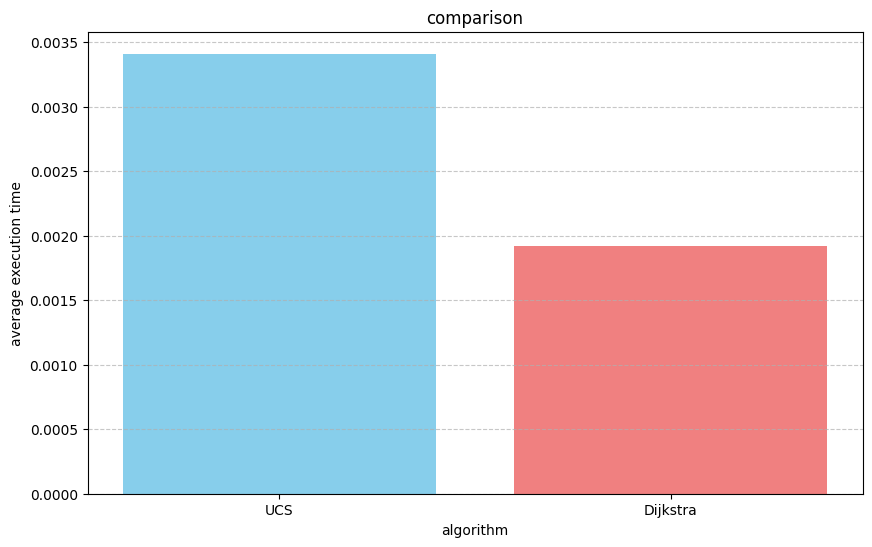

--------------------------------------------------


In [ ]:
import time
import heapq # 라이브러리 사용
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 폰트 설정용



# --- 데이터 정의 (단계 2) ---
# 1호선 급행은 아직 도입하지 않습니다. (단계 3에서 도입)
# 1호선 분기점 역 (여기서만 분기 환승 3분 적용)
branch_stations_1_line = ["구로", "병점", "금천구청"]
# 2호선 지선 분기점 (일반 환승 2분 적용)
branch_stations_2_line = ["성수", "신도림"]
# 5호선 지선 분기점 (일반 환승 2분 적용)
branch_stations_5_line = ["강동"]

# 단계 2의 subway_lines 정의 (단계 1과 동일)
subway_lines_step2 = {
    '1': ["소요산","동두천","보산","동두천중앙","지행","덕정","덕계","양주","녹양","가능",
          "의정부","회룡","망월사","도봉산","도봉","방학","창동","녹천","월계","성북",
          "석계","신이문","외대앞","회기","청량리","제기동","신설동","동묘앞","동대문","종로5가",
          "종로3가","종각","시청","서울역","남영","용산","노량진","대방","신길","영등포",
          "신도림","구로", "가산디지털단지","독산","금천구청","석수","관악","안양","명학",
          "금정","군포","당정","의왕","성균관대","화서","수원","세류","병점","세마","오산대","오산","진위","송탄","서정리","지제","평택","성환","직산","두정",
          "천안","봉명","쌍용","아산","배방","온양온천","신창"],
    '1인천':["구로","구일","개봉","오류동","온수","역곡","소사","부천","중동",
            "송내","부개","부평","백운","동암","간석","주안","도화","제물포","도원","동인천","인천"],
    '1서동탄': ["병점","서동탄"],
    '1광명' : ["금천구청","광명"],
    '2': ["시청","을지로입구","을지로3가","을지로4가","동대문역사문화공원","신당","상왕십리",
          "왕십리","한양대","뚝섬","성수","건대입구","구의","강변","잠실나루","잠실","신천",
          "종합운동장","삼성","선릉","역삼","강남","교대","서초","방배","사당","낙성대","서울대입구",
          "봉천","신림","신대방","구로디지털단지","대림","신도림","문래","영등포구청","당산","합정",
          "홍대입구","신촌","이대","아현","충정로","시청"],
    '2신설동' : ["성수","용답","신답","용두","신설동"],
    '2까치산' : ["신도림","도림천","양천구청","신정네거리","까치산"],
    '3': ["대화","주엽","정발산","마두","백석","대곡","화정","원당","삼송","지축",
          "구파발","연신내","불광","녹번","홍제","무악재","독립문","경복궁","안국","종로3가",
          "을지로3가","충무로","동대입구","약수","금호","옥수","압구정","신사","잠원",
          "고속터미널","교대","남부터미널","양재","매봉","도곡","대치","학여울","대청",
          "일원","수서","가락시장","경찰병원","오금"],
    '4': ["진접","오남","별내별가람","당고개","상계","노원","창동","쌍문","수유","미아",
          "미아삼거리","길음","성신여대입구","한성대입구","혜화","동대문","동대문역사문화공원",
          "충무로","명동","회현","서울역","숙대입구","삼각지","신용산","이촌","동작","이수",
          "사당","남태령","선바위","경마공원","대공원","과천","정부과천청사","인덕원","평촌",
          "범계","금정","산본","수리산","대야미","반월","상록수","한대앞","중앙","고잔","공단",
          "안산","신길온천","정왕","오이도"],
    '5하남검단산': ["방화","개화산","김포공항","송정","마곡","발산","우장산","화곡","까치산","신정",
                  "목동","오목교","양평","영등포구청","영등포시장","신길","여의도","여의나루","마포",
                  "공덕","애오개","충정로","서대문","광화문","종로3가","을지로4가","동대문역사문화공원",
                  "청구","신금호","행당","왕십리","마장","답십리","장한평","군자","아차산","광나루",
                  "천호","강동","길동","굽은다리","명일","고덕","상일동","강일","미사","하남풍산","하남시청","하남검단산"],
    '5마천':["강동","둔촌동","올림픽공원","방이",
            "오금","개롱","거여","마천"]
}

# 그래프 생성 (단계 2 기준)
graph_step2 = defaultdict(list)
station_to_nodes_step2 = defaultdict(list)

for line_full_name, stations in subway_lines_step2.items():
    for i in range(len(stations)):
        station_name = stations[i]
        current_node = (line_full_name, station_name)
        station_to_nodes_step2[station_name].append(current_node)

        if i < len(stations) - 1:
            next_station_name = stations[i+1]
            next_node = (line_full_name, next_station_name)
            graph_step2[current_node].append((next_node, 2))
            graph_step2[next_node].append((current_node, 2))

# 환승 엣지 추가 (단계 2 기준)
for station_name, nodes_at_station in station_to_nodes_step2.items():
    for i in range(len(nodes_at_station)):
        for j in range(i + 1, len(nodes_at_station)):
            node1 = nodes_at_station[i]
            node2 = nodes_at_station[j]

            line_full_name1, _ = node1
            line_full_name2, _ = node2

            line_num1 = line_full_name1[0]
            line_num2 = line_full_name2[0]

            cost = 0

            if line_num1 == line_num2: # 같은 호선 내 환승
                if line_num1 == '1':
                    # 1호선 본선과 지선 간 환승
                    if (line_full_name1 == '1' and line_full_name2.startswith('1')) or \
                       (line_full_name2 == '1' and line_full_name1.startswith('1')):
                        if station_name in branch_stations_1_line:
                            cost = 3 # 분기 환승: 3분
                        else:
                            cost = 2 # 분기역이 아닌 1호선 내 환승
                elif line_num1 == '2': # 2호선 지선 환승
                    if (line_full_name1 == '2' and line_full_name2.startswith('2')) or \
                       (line_full_name2 == '2' and line_full_name1.startswith('2')):
                        if station_name in branch_stations_2_line:
                            cost = 3 # 분기 환승: 3분
                        else:
                            cost = 2 # 분기역이 아닌 2호선 내 환승
                elif line_num1 == '5': # 5호선 지선 환승
                    if (line_full_name1 == '5하남검단산' and line_full_name2 == '5마천') or \
                       (line_full_name2 == '5하남검단산' and line_full_name1 == '5마천'):
                        if station_name in branch_stations_5_line:
                            cost = 3 # 분기 환승: 3분
                        else:
                            cost = 2 # 분기역이 아닌 5호선 내 환승
                else:
                    cost = 2
            else: # 다른 호선 간 환승
                cost = 2

            if cost > 0:
                graph_step2[node1].append((node2, cost))
                graph_step2[node2].append((node1, cost))

# --- 알고리즘 정의 (heapq 라이브러리 사용) ---
def ucs_shortest_path_heapq(graph, start_station_name, end_station_name):
    start_nodes = station_to_nodes_step2.get(start_station_name, [])
    end_nodes = station_to_nodes_step2.get(end_station_name, [])

    if not start_nodes or not end_nodes: return None, float('inf')

    pq = [] # (cost, node, path)
    visited_cost = {}

    for s_node in start_nodes:
      if s_node not in visited_cost or 0 < visited_cost[s_node]:
        heapq.heappush(pq, (0, s_node, [s_node]))
        visited_cost[s_node] = 0

    min_cost = float('inf')
    shortest_path = None

    while pq:
        cost, node, path = heapq.heappop(pq)

        if cost > visited_cost.get(node, float('inf')):
            continue

        if node in end_nodes: # 목표 노드에 도달했으면 (여러 목표 노드 중 최소값)
          return path, cost

        for neighbor, weight in graph[node]:
            new_cost = cost + weight
            if new_cost < visited_cost.get(neighbor, float('inf')):
                visited_cost[neighbor] = new_cost
                heapq.heappush(pq, (new_cost, neighbor, path + [neighbor]))

    return None, float('inf')

def dijkstra_shortest_path_heapq(graph, start_station_name, end_station_name):
    start_nodes = station_to_nodes_step2.get(start_station_name, [])
    end_nodes = station_to_nodes_step2.get(end_station_name, [])

    if not start_nodes or not end_nodes: return None, float('inf')

    pq = [] # (cost, node)
    dist = {node: float('inf') for node in graph}
    prev = {node: None for node in graph}

    for s_node in start_nodes:
        dist[s_node] = 0
        heapq.heappush(pq, (0, s_node))

    min_cost = float('inf')
    final_end_node = None

    while pq:
        cost, u = heapq.heappop(pq)

        if cost > dist[u]:
            continue

        if u in end_nodes: # 목표 노드에 도달했으면 (여러 목표 노드 중 최소값)
            if cost < min_cost:
                min_cost = cost
                final_end_node = u
            continue # 다른 경로도 탐색 (더 짧은 경로가 나올 수 있음)

        for v, weight in graph[u]:
            new_cost = cost + weight
            if new_cost < dist[v]:
                dist[v] = new_cost
                prev[v] = u
                heapq.heappush(pq, (new_cost, v))

    if final_end_node:
        path = []
        curr = final_end_node
        while curr:
            path.append(curr)
            curr = prev[curr]
        return list(reversed(path)), min_cost
    else:
        return None, float('inf')

def measure_time(func, graph, start_station_name, end_station_name, repeats=1000):
    times = []
    result = None
    for _ in range(repeats):
        start = time.time()
        result = func(graph, start_station_name, end_station_name)
        times.append(time.time() - start)
    return sum(times) / repeats, result

def print_path_verbose(path, total_time):
    print("\n🛤️ 최단 경로 상세:")
    last_line, last_station = path[0]
    print(f"  출발 ▶️ [{last_line}호선] {last_station}")

    for i in range(1, len(path)):
        cur_line, cur_station = path[i]
        prev_line, prev_station = path[i-1]

        # 노선명에서 숫자 부분 추출 (예: '1인천' -> '1', '2까치산' -> '2')
        prev_line_num = prev_line[0] if prev_line[0].isdigit() else prev_line
        cur_line_num = cur_line[0] if cur_line[0].isdigit() else cur_line

        if cur_line == prev_line: # 동일한 노선/타입 내 이동
            print(f"  ➡️ 이동: {prev_station} → {cur_station} ({cur_line}호선, 2분 소요)")
        elif prev_line_num == cur_line_num: # 같은 호선 내 다른 타입으로 변경 (지선/본선)
            if station_name in branch_stations_1_line and prev_line_num == '1': # 1호선 분기역 환승
                 print(f"  🔁 분기 환승: {prev_line}호선 -> {cur_line}호선 @ {cur_station} (3분 소요)")
            else: # 그 외 같은 호선 내 다른 타입 환승 (예: 2호선 지선)
                print(f"  🔄 환승: {prev_line}호선 -> {cur_line}호선 @ {cur_station} (2분 소요)")
        else: # 다른 호선으로 환승
            print(f"  🚇 환승: {prev_line}호선 -> {cur_line}호선 @ {cur_station} (2분 소요)")

    print(f"\n⏱️ 총 소요 시간: {total_time}분\n")

# --- 테스트 (단계 2) ---
print("\n--- 단계 2: heapq 라이브러리 사용 & UCS/다익스트라 비교 ---")
start_station_name = "서울역"
end_station_name = "인천"

algorithms_step2 = [
    ("UCS", ucs_shortest_path_heapq),
    ("Dijkstra", dijkstra_shortest_path_heapq)
]

results_step2 = []
for name, func in algorithms_step2:
    avg_time, (path, cost) = measure_time(func, graph_step2, start_station_name, end_station_name)
    path_length = len(path) if path else 0
    results_step2.append({
        "Algorithm": name,
        "평균 시간 (초)": f"{avg_time:.6f}",
        "총 소요 시간 (분)": cost,
        "경로 길이 (역 개수)": path_length
    })

df_step2 = pd.DataFrame(results_step2)
print(df_step2)

# 최단 경로 출력 (다익스트라 결과 사용)
path_dijkstra, cost_dijkstra = dijkstra_shortest_path_heapq(graph_step2, start_station_name, end_station_name)
if path_dijkstra:
    print_path_verbose(path_dijkstra, cost_dijkstra)

# 성능 비교 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_step2["Algorithm"], df_step2["평균 시간 (초)"].astype(float), color=['skyblue', 'lightcoral'])
plt.xlabel("algorithm")
plt.ylabel("average execution time")
plt.title("comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("-" * 50)




--- 단계 3: 1호선 행선지 시스템 및 급행 추가 ---

급행 고려 - '서울역'에서 '인천'까지
  Algorithm 평균 시간 (초)  총 소요 시간 (분)  경로 길이 (역 개수)
0       UCS  0.003845           48            25
1  Dijkstra  0.005215           48            25

🛤️ 최단 경로 상세:
  출발 ▶️ [1 급행선] 서울역
  ➡️ 이동: 서울역 → 노량진 (1 급행선, 2분 소요)
  ➡️ 이동: 노량진 → 신길 (1 급행선, 2분 소요)
  ➡️ 이동: 신길 → 구로 (1 급행선, 2분 소요)
  🔁 분기 환승: [1 급행선] 구로 -> [1 인천선] 구로 (3분 소요)
  ➡️ 이동: 구로 → 구일 (1 인천선, 2분 소요)
  ➡️ 이동: 구일 → 개봉 (1 인천선, 2분 소요)
  ➡️ 이동: 개봉 → 오류동 (1 인천선, 2분 소요)
  ➡️ 이동: 오류동 → 온수 (1 인천선, 2분 소요)
  ➡️ 이동: 온수 → 역곡 (1 인천선, 2분 소요)
  ➡️ 이동: 역곡 → 소사 (1 인천선, 2분 소요)
  ➡️ 이동: 소사 → 부천 (1 인천선, 2분 소요)
  ➡️ 이동: 부천 → 중동 (1 인천선, 2분 소요)
  ➡️ 이동: 중동 → 송내 (1 인천선, 2분 소요)
  ➡️ 이동: 송내 → 부개 (1 인천선, 2분 소요)
  ➡️ 이동: 부개 → 부평 (1 인천선, 2분 소요)
  ➡️ 이동: 부평 → 백운 (1 인천선, 2분 소요)
  ➡️ 이동: 백운 → 동암 (1 인천선, 2분 소요)
  ➡️ 이동: 동암 → 간석 (1 인천선, 2분 소요)
  ➡️ 이동: 간석 → 주안 (1 인천선, 2분 소요)
  ➡️ 이동: 주안 → 도화 (1 인천선, 2분 소요)
  ➡️ 이동: 도화 → 제물포 (1 인천선, 2분 소요)
  ➡️ 이동: 제물포 → 도원 (1 인천선, 2분 소요)
  ➡️ 이동: 도원 → 동인천 (1 인천선, 2분 소요)
  ➡️

<ipython-input-1-3f32eb9fbb8a>:353: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-3f32eb9fbb8a>:353: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-3f32eb9fbb8a>:353: UserWarning: Glyph 44620 (\N{HANGUL SYLLABLE GGA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-3f32eb9fbb8a>:353: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages

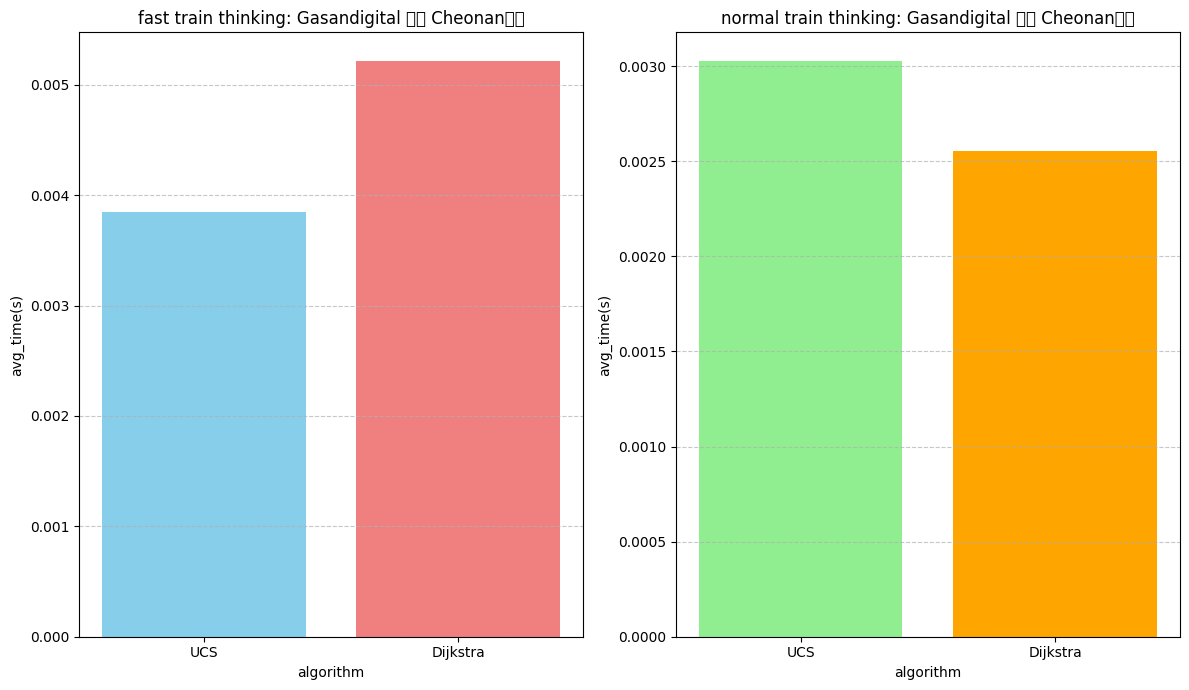

--------------------------------------------------


In [ ]:
import time
import heapq
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



# --- 데이터 정의 (단계 3 - 확장) ---
# 1호선 급행 정차역 정의 (단계 3에 추가)
express_1_line_stations = [
    "연천", "동두천", "덕계", "의정부", "창동", "월계", "광운대", "석계", "회기", "청량리",
    "신설동", "동대문", "종로3가", "서울역", "노량진", "신길", "구로", "금천구청", "안양",
    "군포", "당정", "성균관대", "화서", "수원", "세류", "병점", "오산", "평택지제", "평택",
    "직산", "천안", "신창"
]

# 1호선 분기점 역 정의 (여기서만 '분기 환승' 3분 적용)
branch_stations_1_line = ["구로", "병점", "금천구청"]
# 2호선 지선 분기점 (일반 환승 2분 적용)
branch_stations_2_line = ["성수", "신도림"]
# 5호선 지선 분기점 (일반 환승 2분 적용)
branch_stations_5_line = ["강동"]

# 확장된 지하철 노선 정의 (단계 3)
# 각 노선은 이제 '노선명', '타입'(normal/express/branch), 그리고 '역 리스트'를 가짐
# (노선명_타입, 역이름) 튜플이 그래프 노드의 기본 형태가 됩니다.
subway_lines_extended_step3 = {
    '1_일반': {
        'type': 'normal',
        'stations': ["소요산","동두천","보산","동두천중앙","지행","덕정","덕계","양주","녹양","가능",
                     "의정부","회룡","망월사","도봉산","도봉","방학","창동","녹천","월계","성북",
                     "석계","신이문","외대앞","회기","청량리","제기동","신설동","동묘앞","동대문","종로5가",
                     "종로3가","종각","시청","서울역","남영","용산","노량진","대방","신길","영등포",
                     "신도림","구로", "가산디지털단지","독산","금천구청","석수","관악","안양","명학",
                     "금정","군포","당정","의왕","성균관대","화서","수원","세류","병점","세마","오산대","오산","진위","송탄","서정리","지제","평택","성환","직산","두정",
                     "천안","봉명","쌍용","아산","배방","온양온천","신창"]
    },
    '1_급행': {
        'type': 'express',
        'stations': express_1_line_stations
    },
    '1_인천': {
        'type': 'branch',
        'stations': ["구로","구일","개봉","오류동","온수","역곡","소사","부천","중동",
                     "송내","부개","부평","백운","동암","간석","주안","도화","제물포","도원","동인천","인천"]
    },
    '1_서동탄': {
        'type': 'branch',
        'stations': ["병점","서동탄"]
    },
    '1_광명': {
        'type': 'branch',
        'stations': ["금천구청","광명"]
    },
    # 1호선에만 추가된 행선지 (예시, 실제 노선과 다를 수 있음)
    # 이 부분은 명확한 '행선지'가 아닌, 실제 지선 노선으로 이미 구현된 것과 동일하게 작동합니다.
    # '소요산행', '연천행', '구로행' 등은 1_일반, 1_급행, 1_인천 등의 노선이 이미 포함하고 있으므로
    # 별도 '행선지' 노선을 추가하기보다, 사용자가 특정 역을 선택했을 때
    # 그 역이 포함된 모든 '노선_타입'을 시작/도착 노드로 고려하는 현재 방식이 더 적절합니다.
    # 예를 들어, '서울역'에서 '소요산행'을 탄다는 것은 '1_일반' 노선을 타는 것을 의미합니다.

    # 기존 2, 3, 4, 5호선
    '2': { 'type': 'normal', 'stations': ["시청","을지로입구","을지로3가","을지로4가","동대문역사문화공원","신당","상왕십리","왕십리","한양대","뚝섬","성수","건대입구","구의","강변","잠실나루","잠실","신천","종합운동장","삼성","선릉","역삼","강남","교대","서초","방배","사당","낙성대","서울대입구","봉천","신림","신대방","구로디지털단지","대림","신도림","문래","영등포구청","당산","합정","홍대입구","신촌","이대","아현","충정로","시청"] },
    '2_신설동': { 'type': 'branch', 'stations': ["성수","용답","신답","용두","신설동"] },
    '2_까치산': { 'type': 'branch', 'stations': ["신도림","도림천","양천구청","신정네거리","까치산"] },
    '3': { 'type': 'normal', 'stations': ["대화","주엽","정발산","마두","백석","대곡","화정","원당","삼송","지축","구파발","연신내","불광","녹번","홍제","무악재","독립문","경복궁","안국","종로3가","을지로3가","충무로","동대입구","약수","금호","옥수","압구정","신사","잠원","고속터미널","교대","남부터미널","양재","매봉","도곡","대치","학여울","대청","일원","수서","가락시장","경찰병원","오금"] },
    '4': { 'type': 'normal', 'stations': ["진접","오남","별내별가람","당고개","상계","노원","창동","쌍문","수유","미아","미아삼거리","길음","성신여대입구","한성대입구","혜화","동대문","동대문역사문화공원","충무로","명동","회현","서울역","숙대입구","삼각지","신용산","이촌","동작","이수","사당","남태령","선바위","경마공원","대공원","과천","정부과천청사","인덕원","평촌","범계","금정","산본","수리산","대야미","반월","상록수","한대앞","중앙","고잔","공단","안산","신길온천","정왕","오이도"] },
    '5_하남검단산': { 'type': 'normal', 'stations': ["방화","개화산","김포공항","송정","마곡","발산","우장산","화곡","까치산","신정","목동","오목교","양평","영등포구청","영등포시장","신길","여의도","여의나루","마포","공덕","애오개","충정로","서대문","광화문","종로3가","을지로4가","동대문역사문화공원","청구","신금호","행당","왕십리","마장","답십리","장한평","군자","아차산","광나루","천호","강동","길동","굽은다리","명일","고덕","상일동","강일","미사","하남풍산","하남시청","하남검단산"] },
    '5_마천': { 'type': 'branch', 'stations': ["강동","둔촌동","올림픽공원","방이","오금","개롱","거여","마천"] }
}

# 그래프 생성 (단계 3 기준)
graph_step3 = defaultdict(list)
station_to_nodes_step3 = defaultdict(list) # 역 이름 -> (노선_타입, 역이름) 매핑

for line_full_name, line_info in subway_lines_extended_step3.items():
    stations = line_info['stations']

    for i in range(len(stations)):
        station_name = stations[i]
        current_node = (line_full_name, station_name)
        station_to_nodes_step3[station_name].append(current_node)

        if i < len(stations) - 1:
            next_station_name = stations[i+1]
            next_node = (line_full_name, next_station_name)

            # 급행은 역 간 이동 시간을 2분으로 동일하게 유지
            graph_step3[current_node].append((next_node, 2))
            graph_step3[next_node].append((current_node, 2))

# 환승 엣지 추가 (단계 3 - 분기 환승 3분, 행선지 변경 1분)
for station_name, nodes_at_station in station_to_nodes_step3.items():
    for i in range(len(nodes_at_station)):
        for j in range(i + 1, len(nodes_at_station)):
            node1 = nodes_at_station[i] # (line_full_name1, station_name)
            node2 = nodes_at_station[j] # (line_full_name2, station_name)

            line_full_name1, _ = node1
            line_full_name2, _ = node2

            line_num1 = line_full_name1.split('_')[0]
            line_num2 = line_full_name2.split('_')[0]

            cost = 0

            if line_num1 == line_num2: # 같은 호선(호선 번호) 내 환승
                if line_num1 == '1':
                    is_node1_branch_line = '_인천' in line_full_name1 or '_서동탄' in line_full_name1 or '_광명' in line_full_name1
                    is_node2_branch_line = '_인천' in line_full_name2 or '_서동탄' in line_full_name2 or '_광명' in line_full_name2

                    is_node1_express = '_급행' in line_full_name1
                    is_node2_express = '_급행' in line_full_name2

                    # 1호선 일반 <-> 지선 환승 (분기 환승: 3분)
                    if (is_node1_branch_line or is_node2_branch_line) and \
                       ((line_full_name1 == '1_일반' or line_full_name2 == '1_일반')) and \
                       station_name in branch_stations_1_line:
                        cost = 3
                    # 1호선 일반 <-> 급행 환승 (행선지 변경 환승: 1분)
                    # 단, 급행이 서는 역에서만 가능
                    elif (is_node1_express != is_node2_express) and \
                         (station_name in express_1_line_stations) and \
                         (station_name not in branch_stations_1_line): # 분기역이 아닌 곳에서
                        cost = 1
                    else: # 그 외 같은 호선 내 환승 (예: 급행-지선 직접 환승 등, 이런 경우는 아마 없을 것)
                        cost = 2
                # 2호선 지선 환승 (일반 노선 간 환승과 동일하게 2분)
                elif line_num1 == '2': # 2호선 지선 환승
                    if (line_full_name1 == '2' and line_full_name2.startswith('2')) or \
                       (line_full_name2 == '2' and line_full_name1.startswith('2')):
                        if station_name in branch_stations_2_line:
                            cost = 3 # 분기 환승: 3분
                        else:
                            cost = 2 # 분기역이 아닌 2호선 내 환승
                elif line_num1 == '5': # 5호선 지선 환승
                    if (line_full_name1 == '5하남검단산' and line_full_name2 == '5마천') or \
                       (line_full_name2 == '5하남검단산' and line_full_name1 == '5마천'):
                        if station_name in branch_stations_5_line:
                            cost = 3 # 분기 환승: 3분
                        else:
                            cost = 2 # 분기역이 아닌 5호선 내 환승
                else: # 그 외 같은 노선 내 다른 타입 간 환승 (일반 2분)
                    cost = 2
            else: # 다른 호선 간 환승
                cost = 2 # 일반 노선 간 환승: 2분

            if cost > 0:
                graph_step3[node1].append((node2, cost))
                graph_step3[node2].append((node1, cost))

# --- 알고리즘 정의 (heapq 라이브러리 사용, 단계 3 그래프 사용) ---
# UCS 함수 (단계 2와 동일하지만 graph_step3 사용)
def ucs_shortest_path_step3(graph, start_station_name, end_station_name):
    start_nodes = station_to_nodes_step3.get(start_station_name, [])
    end_nodes = station_to_nodes_step3.get(end_station_name, [])

    if not start_nodes or not end_nodes: return None, float('inf')

    pq = [] # (cost, node, path)
    visited_cost = {}

    for s_node in start_nodes:
      if s_node not in visited_cost or 0 < visited_cost[s_node]:
        heapq.heappush(pq, (0, s_node, [s_node]))
        visited_cost[s_node] = 0

    min_cost = float('inf')
    shortest_path = None

    while pq:
        cost, node, path = heapq.heappop(pq)

        if cost > visited_cost.get(node, float('inf')):
            continue

        if node in end_nodes: # 목표 노드에 도달했으면 (여러 목표 노드 중 최소값)
          return path, cost

        for neighbor, weight in graph[node]:
            new_cost = cost + weight
            if new_cost < visited_cost.get(neighbor, float('inf')):
                visited_cost[neighbor] = new_cost
                heapq.heappush(pq, (new_cost, neighbor, path + [neighbor]))

    return None, float('inf')

# 다익스트라 함수 (단계 2와 동일하지만 graph_step3 사용)
def dijkstra_shortest_path_step3(graph, start_station_name, end_station_name):
    start_nodes = station_to_nodes_step3.get(start_station_name, [])
    end_nodes = station_to_nodes_step3.get(end_station_name, [])
    if not start_nodes or not end_nodes: return None, float('inf')

    pq = [] # (cost, node)
    dist = {node: float('inf') for node in graph}
    prev = {node: None for node in graph}

    for s_node in start_nodes:
        dist[s_node] = 0
        heapq.heappush(pq, (0, s_node))

    min_cost = float('inf')
    final_end_node = None

    while pq:
        cost, u = heapq.heappop(pq)

        if cost > dist[u]:
            continue

        if u in end_nodes:
            if cost < min_cost:
                min_cost = cost
                final_end_node = u
            continue

        for v, weight in graph[u]:
            new_cost = cost + weight
            if new_cost < dist[v]:
                dist[v] = new_cost
                prev[v] = u
                heapq.heappush(pq, (new_cost, v))

    if final_end_node:
        path = []
        curr = final_end_node
        while curr:
            path.append(curr)
            curr = prev[curr]
        return list(reversed(path)), min_cost
    else:
        return None, float('inf')

# 시간 측정 함수 (단계 2와 동일)
def measure_time(func, graph, start_station_name, end_station_name, repeats=1000):
    times = []
    result = None
    for _ in range(repeats):
        start = time.time()
        result = func(graph, start_station_name, end_station_name)
        times.append(time.time() - start)
    return sum(times) / repeats, result

# 경로 상세 출력 함수 (단계 3에 맞게 업데이트)
def print_path_verbose_step3(path, total_time):
    print("\n🛤️ 최단 경로 상세:")
    last_line_full, last_station = path[0]
    last_line_display = last_line_full.replace('_', ' ') # '1_일반' -> '1 일반'
    print(f"  출발 ▶️ [{last_line_display}선] {last_station}")

    for i in range(1, len(path)):
        cur_line_full, cur_station = path[i]
        prev_line_full, prev_station = path[i-1]

        prev_line_num = prev_line_full.split('_')[0]
        cur_line_num = cur_line_full.split('_')[0]

        prev_line_display = prev_line_full.replace('_', ' ')
        cur_line_display = cur_line_full.replace('_', ' ')

        if cur_line_full == prev_line_full: # 동일한 노선/타입 내 이동
            print(f"  ➡️ 이동: {prev_station} → {cur_station} ({cur_line_display}선, 2분 소요)")
        elif prev_line_num == cur_line_num: # 같은 호선 내 다른 타입으로 변경 (지선/본선/급행)
            if prev_line_num == '1' and (prev_station in branch_stations_1_line or cur_station in branch_stations_1_line):
                # 1호선 분기역 환승 (3분)
                print(f"  🔁 분기 환승: [{prev_line_display}선] {prev_station} -> [{cur_line_display}선] {cur_station} (3분 소요)")
            elif prev_line_num == '1' and (prev_line_full.endswith('_급행') or cur_line_full.endswith('_급행')):
                # 1호선 급행/일반 간 환승 (1분)
                print(f"  🔄 행선지 변경 환승: [{prev_line_display}선] {prev_station} -> [{cur_line_display}선] {cur_station} (1분 소요)")
            else: # 그 외 같은 호선 내 지선/본선 환승 (예: 2호선 지선)
                print(f"  ↔️ 환승: [{prev_line_display}선] {prev_station} -> [{cur_line_display}선] {cur_station} (2분 소요)")
        else: # 다른 호선으로 환승
            print(f"  🚇 환승: [{prev_line_display}선] {prev_station} -> [{cur_line_display}선] {cur_station} (2분 소요)")

    print(f"\n⏱️ 총 소요 시간: {total_time}분\n")

# --- 테스트 (단계 3) ---
print("\n--- 단계 3: 1호선 행선지 시스템 및 급행 추가 ---")
start_station_name = "서울역"
end_station_name = "인천"

# 급행으로 가는 경우
algorithms_step3_express = [
    ("UCS", ucs_shortest_path_step3),
    ("Dijkstra", dijkstra_shortest_path_step3)
]

results_step3_express = []
for name, func in algorithms_step3_express:
    avg_time, (path, cost) = measure_time(func, graph_step3, start_station_name, end_station_name)
    path_length = len(path) if path else 0
    results_step3_express.append({
        "Algorithm": name,
        "평균 시간 (초)": f"{avg_time:.6f}",
        "총 소요 시간 (분)": cost,
        "경로 길이 (역 개수)": path_length
    })

df_step3_express = pd.DataFrame(results_step3_express)
print(f"\n급행 고려 - '{start_station_name}'에서 '{end_station_name}'까지")
print(df_step3_express)

# 최단 경로 출력 (다익스트라 결과 사용)
path_dijkstra_express, cost_dijkstra_express = dijkstra_shortest_path_step3(graph_step3, start_station_name, end_station_name)
if path_dijkstra_express:
    print_path_verbose_step3(path_dijkstra_express, cost_dijkstra_express)

# 일반선으로 가는 경우 (예시)
start_station_name_normal = "가산디지털단지"
end_station_name_normal = "천안" # 급행이 서지만, 일반선이 더 빠를 수도 있는 역

results_step3_normal = []
for name, func in algorithms_step3_express:
    avg_time, (path, cost) = measure_time(func, graph_step3, start_station_name_normal, end_station_name_normal)
    path_length = len(path) if path else 0
    results_step3_normal.append({
        "Algorithm": name,
        "평균 시간 (초)": f"{avg_time:.6f}",
        "총 소요 시간 (분)": cost,
        "경로 길이 (역 개수)": path_length
    })

df_step3_normal = pd.DataFrame(results_step3_normal)
print(f"\n일반선 고려 - '{start_station_name_normal}'에서 '{end_station_name_normal}'까지")
print(df_step3_normal)

# 최단 경로 출력 (다익스트라 결과 사용)
path_dijkstra_normal, cost_dijkstra_normal = dijkstra_shortest_path_step3(graph_step3, start_station_name_normal, end_station_name_normal)
if path_dijkstra_normal:
    print_path_verbose_step3(path_dijkstra_normal, cost_dijkstra_normal)

# 성능 비교 시각화 (두 가지 경로 비교)
plt.figure(figsize=(12, 7))

# 급행 고려 경로
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째
plt.bar(df_step3_express["Algorithm"], df_step3_express["평균 시간 (초)"].astype(float), color=['skyblue', 'lightcoral'])
plt.xlabel("algorithm")
plt.ylabel("avg_time(s)")
plt.title(f"fast train thinking: Gasandigital 에서 Cheonan까지")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 일반선 고려 경로
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째
plt.bar(df_step3_normal["Algorithm"], df_step3_normal["평균 시간 (초)"].astype(float), color=['lightgreen', 'orange'])
plt.xlabel("algorithm")
plt.ylabel("avg_time(s)")
plt.title(f"normal train thinking: Gasandigital 에서 Cheonan까지")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("-" * 50)


--- 단계 3: 1호선 행선지 시스템 및 급행 추가 ---

급행 고려 - '서울역'에서 '인천'까지
  Algorithm 평균 시간 (초)  총 소요 시간 (분)  경로 길이 (역 개수)
0       UCS  0.000620           49            25
1  Dijkstra  0.000805           49            25

🛤️ 최단 경로 상세:
  출발 ▶️ [1 급행선] 서울역
  ➡️ 이동: 서울역 → 노량진 (1 급행선, 2분 소요)
  ➡️ 이동: 노량진 → 신길 (1 급행선, 2분 소요)
  ➡️ 이동: 신길 → 구로 (1 급행선, 2분 소요)
  🔁 분기 환승: [1 급행선] 구로 -> [1 인천선] 구로 (3분 소요)
  ➡️ 이동: 구로 → 구일 (1 인천선, 2분 소요)
  ➡️ 이동: 구일 → 개봉 (1 인천선, 2분 소요)
  ➡️ 이동: 개봉 → 오류동 (1 인천선, 2분 소요)
  ➡️ 이동: 오류동 → 온수 (1 인천선, 2분 소요)
  ➡️ 이동: 온수 → 역곡 (1 인천선, 2분 소요)
  ➡️ 이동: 역곡 → 소사 (1 인천선, 2분 소요)
  ➡️ 이동: 소사 → 부천 (1 인천선, 2분 소요)
  ➡️ 이동: 부천 → 중동 (1 인천선, 2분 소요)
  ➡️ 이동: 중동 → 송내 (1 인천선, 2분 소요)
  ➡️ 이동: 송내 → 부개 (1 인천선, 2분 소요)
  ➡️ 이동: 부개 → 부평 (1 인천선, 2분 소요)
  ➡️ 이동: 부평 → 백운 (1 인천선, 2분 소요)
  ➡️ 이동: 백운 → 동암 (1 인천선, 2분 소요)
  ➡️ 이동: 동암 → 간석 (1 인천선, 2분 소요)
  ➡️ 이동: 간석 → 주안 (1 인천선, 2분 소요)
  ➡️ 이동: 주안 → 도화 (1 인천선, 2분 소요)
  ➡️ 이동: 도화 → 제물포 (1 인천선, 2분 소요)
  ➡️ 이동: 제물포 → 도원 (1 인천선, 2분 소요)
  ➡️ 이동: 도원 → 동인천 (1 인천선, 2분 소요)
  ➡️

<ipython-input-28-a3ff7a4ff9eb>:371: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a3ff7a4ff9eb>:371: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a3ff7a4ff9eb>:371: UserWarning: Glyph 44620 (\N{HANGUL SYLLABLE GGA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a3ff7a4ff9eb>:371: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()



일반선 고려 - '가산디지털단지'에서 '천안'까지
  Algorithm 평균 시간 (초)  총 소요 시간 (분)  경로 길이 (역 개수)
0       UCS  0.000767           33            17
1  Dijkstra  0.000877           33            17

🛤️ 최단 경로 상세:
  출발 ▶️ [1 일반선] 가산디지털단지
  ➡️ 이동: 가산디지털단지 → 독산 (1 일반선, 2분 소요)
  ➡️ 이동: 독산 → 금천구청 (1 일반선, 2분 소요)
  🔁 분기 환승: [1 일반선] 금천구청 -> [1 급행선] 금천구청 (3분 소요)
  ➡️ 이동: 금천구청 → 안양 (1 급행선, 2분 소요)
  ➡️ 이동: 안양 → 군포 (1 급행선, 2분 소요)
  ➡️ 이동: 군포 → 당정 (1 급행선, 2분 소요)
  ➡️ 이동: 당정 → 성균관대 (1 급행선, 2분 소요)
  ➡️ 이동: 성균관대 → 화서 (1 급행선, 2분 소요)
  ➡️ 이동: 화서 → 수원 (1 급행선, 2분 소요)
  ➡️ 이동: 수원 → 세류 (1 급행선, 2분 소요)
  ➡️ 이동: 세류 → 병점 (1 급행선, 2분 소요)
  ➡️ 이동: 병점 → 오산 (1 급행선, 2분 소요)
  ➡️ 이동: 오산 → 평택지제 (1 급행선, 2분 소요)
  ➡️ 이동: 평택지제 → 평택 (1 급행선, 2분 소요)
  ➡️ 이동: 평택 → 직산 (1 급행선, 2분 소요)
  ➡️ 이동: 직산 → 천안 (1 급행선, 2분 소요)

⏱️ 총 소요 시간: 33분



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44620 (\N{HANGUL SYLLABLE GGA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


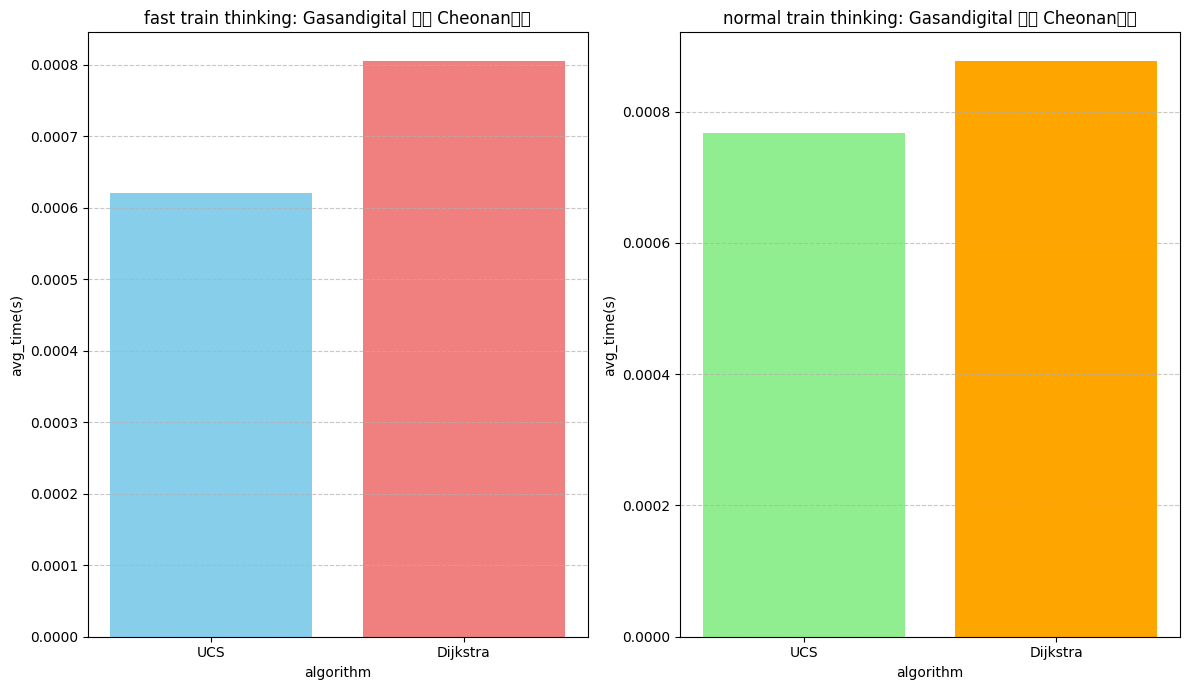

--------------------------------------------------


In [ ]:
import time
import heapq
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# --- 데이터 정의 (단계 4) ---

# 기존의 리스트들을 이제 새로운 통합 딕셔너리를 만드는 데 활용합니다.
express_1_line_stations = [
    "연천", "동두천", "덕계", "의정부", "창동", "월계", "광운대", "석계", "회기", "청량리",
    "신설동", "동대문", "종로3가", "서울역", "노량진", "신길", "구로", "금천구청", "안양",
    "군포", "당정", "성균관대", "화서", "수원", "세류", "병점", "오산", "평택지제", "평택",
    "직산", "천안", "신창"
]

branch_stations_1_line = ["구로", "병점", "금천구청"]
branch_stations_2_line = ["성수", "신도림"]
branch_stations_5_line = ["강동"]


# 지하철 노선 정의 (여기서 역별 속성을 채워넣을 것입니다)
subway_lines_extended_step3 = {
    '1_일반': {
        'type': 'normal',
        'stations': ["소요산","동두천","보산","동두천중앙","지행","덕정","덕계","양주","녹양","가능",
                     "의정부","회룡","망월사","도봉산","도봉","방학","창동","녹천","월계","성북",
                     "석계","신이문","외대앞","회기","청량리","제기동","신설동","동묘앞","동대문","종로5가",
                     "종로3가","종각","시청","서울역","남영","용산","노량진","대방","신길","영등포",
                     "신도림","구로", "가산디지털단지","독산","금천구청","석수","관악","안양","명학",
                     "금정","군포","당정","의왕","성균관대","화서","수원","세류","병점","세마","오산대","오산","진위","송탄","서정리","지제","평택","성환","직산","두정",
                     "천안","봉명","쌍용","아산","배방","온양온천","신창"]
    },
    '1_급행': {
        'type': 'express',
        'stations': express_1_line_stations
    },
    '1_인천': {
        'type': 'branch',
        'stations': ["구로","구일","개봉","오류동","온수","역곡","소사","부천","중동",
                     "송내","부개","부평","백운","동암","간석","주안","도화","제물포","도원","동인천","인천"]
    },
    '1_서동탄': {
        'type': 'branch',
        'stations': ["병점","서동탄"]
    },
    '1_광명': {
        'type': 'branch',
        'stations': ["금천구청","광명"]
    },
    '2': { 'type': 'normal', 'stations': ["시청","을지로입구","을지로3가","을지로4가","동대문역사문화공원","신당","상왕십리","왕십리","한양대","뚝섬","성수","건대입구","구의","강변","잠실나루","잠실","신천","종합운동장","삼성","선릉","역삼","강남","교대","서초","방배","사당","낙성대","서울대입구","봉천","신림","신대방","구로디지털단지","대림","신도림","문래","영등포구청","당산","합정","홍대입구","신촌","이대","아현","충정로","시청"] },
    '2_신설동': { 'type': 'branch', 'stations': ["성수","용답","신답","용두","신설동"] },
    '2_까치산': { 'type': 'branch', 'stations': ["신도림","도림천","양천구청","신정네거리","까치산"] },
    '3': { 'type': 'normal', 'stations': ["대화","주엽","정발산","마두","백석","대곡","화정","원당","삼송","지축","구파발","연신내","불광","녹번","홍제","무악재","독립문","경복궁","안국","종로3가","을지로3가","충무로","동대입구","약수","금호","옥수","압구정","신사","잠원","고속터미널","교대","남부터미널","양재","매봉","도곡","대치","학여울","대청","일원","수서","가락시장","경찰병원","오금"] },
    '4': { 'type': 'normal', 'stations': ["진접","오남","별내별가람","당고개","상계","노원","창동","쌍문","수유","미아","미아삼거리","길음","성신여대입구","한성대입구","혜화","동대문","동대문역사문화공원","충무로","명동","회현","서울역","숙대입구","삼각지","신용산","이촌","동작","이수","사당","남태령","선바위","경마공원","대공원","과천","정부과천청사","인덕원","평촌","범계","금정","산본","수리산","대야미","반월","상록수","한대앞","중앙","고잔","공단","안산","신길온천","정왕","오이도"] },
    '5_하남검단산': { 'type': 'normal', 'stations': ["방화","개화산","김포공항","송정","마곡","발산","우장산","화곡","까치산","신정","목동","오목교","양평","영등포구청","영등포시장","신길","여의도","여의나루","마포","공덕","애오개","충정로","서대문","광화문","종로3가","을지로4가","동대문역사문화공원","청구","신금호","행당","왕십리","마장","답십리","장한평","군자","아차산","광나루","천호","강동","길동","굽은다리","명일","고덕","상일동","강일","미사","하남풍산","하남시청","하남검단산"] },
    '5_마천': { 'type': 'branch', 'stations': ["강동","둔촌동","올림픽공원","방이","오금","개롱","거여","마천"] }
}

# --- 새로운 통합 역 정보 딕셔너리 (Hash Table) 생성 ---
# station_name을 키로 하고, 해당 역의 속성들을 값으로 가지는 딕셔너리
all_station_properties = defaultdict(lambda: {
    'lines': set(), # 해당 역을 지나는 모든 노선 번호 (예: {'1', '2', '5'})
    'full_line_names': set(), # 해당 역을 지나는 모든 전체 노선명 (예: {'1_일반', '1_급행'})
    'express_stop': {}, # 노선 번호별 급행 정차 여부 (예: {'1': True, '4': False})
    'branch_transfer_cost': {} # 노선 번호별 분기 환승 비용 (예: {'1': 3, '2': 2})
})

for line_full_name, line_info in subway_lines_extended_step3.items():
    line_num = line_full_name.split('_')[0] # '1_일반' -> '1'

    for station_name in line_info['stations']:
        # 역이 지나는 노선 추가
        all_station_properties[station_name]['lines'].add(line_num)
        all_station_properties[station_name]['full_line_names'].add(line_full_name)

        # 급행 정차 여부 설정 (1호선 급행 노선인 경우)
        if line_full_name == '1_급행':
            all_station_properties[station_name]['express_stop'][line_num] = True
        elif line_num not in all_station_properties[station_name]['express_stop']:
            all_station_properties[station_name]['express_stop'][line_num] = False # 다른 노선은 기본적으로 급행 없음

        # 분기 환승 비용 설정
        if station_name in branch_stations_1_line and line_num == '1':
            all_station_properties[station_name]['branch_transfer_cost'][line_num] = 3
        elif station_name in branch_stations_2_line and line_num == '2':
            all_station_properties[station_name]['branch_transfer_cost'][line_num] = 3
        elif station_name in branch_stations_5_line and line_num == '5':
            all_station_properties[station_name]['branch_transfer_cost'][line_num] = 3


# --- 그래프 생성 (단계 3 기준) ---
graph_step3 = defaultdict(list)
# station_to_nodes_step3는 기존과 동일하게 사용 (역 이름 -> (노선_타입, 역이름) 매핑)
station_to_nodes_step3 = defaultdict(list)

for line_full_name, line_info in subway_lines_extended_step3.items():
    stations = line_info['stations']

    for i in range(len(stations)):
        station_name = stations[i]
        current_node = (line_full_name, station_name)
        station_to_nodes_step3[station_name].append(current_node)

        if i < len(stations) - 1:
            next_station_name = stations[i+1]
            next_node = (line_full_name, next_station_name)

            # 급행은 역 간 이동 시간을 2분으로 동일하게 유지 (모든 역 간 이동 시간 2분으로 가정)
            graph_step3[current_node].append((next_node, 2))
            graph_step3[next_node].append((current_node, 2))


# --- 환승 엣지 추가 (단계 3 - 분기 환승 3분, 행선지 변경 1분) ---
for station_name, nodes_at_station in station_to_nodes_step3.items():
    for i in range(len(nodes_at_station)):
        for j in range(i + 1, len(nodes_at_station)):
            node1 = nodes_at_station[i] # (line_full_name1, station_name)
            node2 = nodes_at_station[j] # (line_full_name2, station_name)

            line_full_name1, _ = node1
            line_full_name2, _ = node2

            line_num1 = line_full_name1.split('_')[0]
            line_num2 = line_full_name2.split('_')[0]

            cost = 0

            # 환승 비용 계산 시 all_station_properties 활용
            # 동일 호선 내 환승
            if line_num1 == line_num2:
                # 1호선 분기/급행 환승
                if line_num1 == '1':
                    # all_station_properties에서 직접 분기 환승 비용 조회
                    if all_station_properties[station_name]['branch_transfer_cost'].get('1') == 3:
                        cost = 3 # 1호선 분기점 환승
                    elif (line_full_name1.endswith('_급행') != line_full_name2.endswith('_급행')) and \
                         all_station_properties[station_name]['express_stop'].get('1'):
                        cost = 1 # 1호선 일반 <-> 급행 환승 (급행 정차역에서)
                    else:
                        cost = 2 # 그 외 1호선 내 환승 (일반적인 같은 호선 환승)
                # 2호선 지선 환승 (2호선 본선 <-> 2호선 지선)
                elif line_num1 == '2':
                    # all_station_properties에서 직접 분기 환승 비용 조회
                    if all_station_properties[station_name]['branch_transfer_cost'].get('2') == 3:
                        cost = 3 # 2호선 지선 분기 환승 (성수, 신도림)
                    else:
                        cost = 2 # 2호선 내 일반 환승 (지선 포함)
                # 5호선 지선 환승 (5호선 본선 <-> 5호선 지선)
                elif line_num1 == '5':
                    # all_station_properties에서 직접 분기 환승 비용 조회
                    if all_station_properties[station_name]['branch_transfer_cost'].get('5') == 3:
                        cost = 3 # 5호선 지선 분기 환승 (강동)
                    else:
                        cost = 2 # 5호선 내 일반 환승 (지선 포함)
                else: # 그 외 같은 호선 내 다른 타입 간 환승 (일반 2분)
                    cost = 2
            else: # 다른 호선 간 환승 (예: 1호선 서울역 <-> 4호선 서울역)
                cost = 2 # 일반 노선 간 환승: 2분

            if cost > 0:
                graph_step3[node1].append((node2, cost))
                graph_step3[node2].append((node1, cost))

# --- 알고리즘 정의 (heapq 라이브러리 사용, graph_step3 사용) ---
# UCS 함수 (기존과 동일)
def ucs_shortest_path_step3(graph, start_station_name, end_station_name):
    start_nodes = station_to_nodes_step3.get(start_station_name, [])
    end_nodes = station_to_nodes_step3.get(end_station_name, [])

    if not start_nodes or not end_nodes: return None, float('inf')

    pq = [] # (cost, node, path)
    visited_cost = {}

    for s_node in start_nodes:
      if s_node not in visited_cost or 0 < visited_cost[s_node]:
        heapq.heappush(pq, (0, s_node, [s_node]))
        visited_cost[s_node] = 0

    min_cost = float('inf')
    shortest_path = None

    while pq:
        cost, node, path = heapq.heappop(pq)

        if cost > visited_cost.get(node, float('inf')):
            continue

        if node in end_nodes: # 목표 노드에 도달했으면 (여러 목표 노드 중 최소값)
          return path, cost

        for neighbor, weight in graph[node]:
            new_cost = cost + weight
            if new_cost < visited_cost.get(neighbor, float('inf')):
                visited_cost[neighbor] = new_cost
                heapq.heappush(pq, (new_cost, neighbor, path + [neighbor]))

    return None, float('inf')

# 다익스트라 함수 (기존과 동일)
def dijkstra_shortest_path_step3(graph, start_station_name, end_station_name):
    start_nodes = station_to_nodes_step3.get(start_station_name, [])
    end_nodes = station_to_nodes_step3.get(end_station_name, [])
    if not start_nodes or not end_nodes: return None, float('inf')

    pq = [] # (cost, node)
    dist = {node: float('inf') for node in graph}
    prev = {node: None for node in graph}

    for s_node in start_nodes:
        dist[s_node] = 0
        heapq.heappush(pq, (0, s_node))

    min_cost = float('inf')
    final_end_node = None

    while pq:
        cost, u = heapq.heappop(pq)

        if cost > dist[u]:
            continue

        if u in end_nodes:
            if cost < min_cost:
                min_cost = cost
                final_end_node = u
            continue

        for v, weight in graph[u]:
            new_cost = cost + weight
            if new_cost < dist[v]:
                dist[v] = new_cost
                prev[v] = u
                heapq.heappush(pq, (new_cost, v))

    if final_end_node:
        path = []
        curr = final_end_node
        while curr:
            path.append(curr)
            curr = prev[curr]
        return list(reversed(path)), min_cost
    else:
        return None, float('inf')

# 시간 측정 함수 (기존과 동일)
def measure_time(func, graph, start_station_name, end_station_name, repeats=1000):
    times = []
    result = None
    for _ in range(repeats):
        start = time.time()
        result = func(graph, start_station_name, end_station_name)
        times.append(time.time() - start)
    return sum(times) / repeats, result

# 경로 상세 출력 함수 (단계 3에 맞게 업데이트)
def print_path_verbose_step3(path, total_time):
    print("\n🛤️ 최단 경로 상세:")
    last_line_full, last_station = path[0]
    last_line_display = last_line_full.replace('_', ' ') # '1_일반' -> '1 일반'
    print(f"  출발 ▶️ [{last_line_display}선] {last_station}")

    for i in range(1, len(path)):
        cur_line_full, cur_station = path[i]
        prev_line_full, prev_station = path[i-1]

        prev_line_num = prev_line_full.split('_')[0]
        cur_line_num = cur_line_full.split('_')[0]

        prev_line_display = prev_line_full.replace('_', ' ')
        cur_line_display = cur_line_full.replace('_', ' ')

        if cur_line_full == prev_line_full: # 동일한 노선/타입 내 이동
            print(f"  ➡️ 이동: {prev_station} → {cur_station} ({cur_line_display}선, 2분 소요)")
        elif prev_line_num == cur_line_num: # 같은 호선(번호) 내 다른 타입으로 변경 (지선/본선/급행)
            # all_station_properties를 활용하여 환승 비용 로직 단순화
            # 해당 역에서 해당 노선 번호에 대한 분기 환승 비용이 3분으로 정의되어 있다면
            if all_station_properties[prev_station]['branch_transfer_cost'].get(prev_line_num) == 3:
                print(f"  🔁 분기 환승: [{prev_line_display}선] {prev_station} -> [{cur_line_display}선] {cur_station} (3분 소요)")
            # 1호선 급행/일반 간 환승
            elif prev_line_num == '1' and (prev_line_full.endswith('_급행') != cur_line_full.endswith('_급행')):
                # 여기서는 역 자체가 급행 정차역인지 여부를 all_station_properties에서 확인
                if all_station_properties[prev_station]['express_stop'].get('1'):
                    print(f"  🔄 행선지 변경 환승: [{prev_line_display}선] {prev_station} -> [{cur_line_display}선] {cur_station} (1분 소요)")
                else: # 급행이 서지 않는 역에서 같은 1호선끼리 환승하는 경우는 2분 (일반 환승)
                    print(f"  ↔️ 환승: [{prev_line_display}선] {prev_station} -> [{cur_line_display}선] {cur_station} (2분 소요)")
            else: # 그 외 같은 호선 내 다른 타입 간 환승 (예: 2호선 지선, 5호선 지선 - 강동 제외)
                print(f"  ↔️ 환승: [{prev_line_display}선] {prev_station} -> [{cur_line_display}선] {cur_station} (2분 소요)")
        else: # 다른 호선으로 환승
            print(f"  🚇 환승: [{prev_line_display}선] {prev_station} -> [{cur_line_display}선] {cur_station} (2분 소요)")

    print(f"\n⏱️ 총 소요 시간: {total_time}분\n")

# --- 테스트 (단계 3) ---
print("\n--- 단계 3: 1호선 행선지 시스템 및 급행 추가 ---")
start_station_name = "서울역"
end_station_name = "인천"

# 급행으로 가는 경우
algorithms_step3_express = [
    ("UCS", ucs_shortest_path_step3),
    ("Dijkstra", dijkstra_shortest_path_step3)
]

results_step3_express = []
for name, func in algorithms_step3_express:
    avg_time, (path, cost) = measure_time(func, graph_step3, start_station_name, end_station_name)
    path_length = len(path) if path else 0
    results_step3_express.append({
        "Algorithm": name,
        "평균 시간 (초)": f"{avg_time:.6f}",
        "총 소요 시간 (분)": cost,
        "경로 길이 (역 개수)": path_length
    })

df_step3_express = pd.DataFrame(results_step3_express)
print(f"\n급행 고려 - '{start_station_name}'에서 '{end_station_name}'까지")
print(df_step3_express)

# 최단 경로 출력 (다익스트라 결과 사용)
path_dijkstra_express, cost_dijkstra_express = dijkstra_shortest_path_step3(graph_step3, start_station_name, end_station_name)
if path_dijkstra_express:
    print_path_verbose_step3(path_dijkstra_express, cost_dijkstra_express)

# 일반선으로 가는 경우 (예시)
start_station_name_normal = "가산디지털단지"
end_station_name_normal = "천안" # 급행이 서지만, 일반선이 더 빠를 수도 있는 역

results_step3_normal = []
for name, func in algorithms_step3_express:
    avg_time, (path, cost) = measure_time(func, graph_step3, start_station_name_normal, end_station_name_normal)
    path_length = len(path) if path else 0
    results_step3_normal.append({
        "Algorithm": name,
        "평균 시간 (초)": f"{avg_time:.6f}",
        "총 소요 시간 (분)": cost,
        "경로 길이 (역 개수)": path_length
    })

df_step3_normal = pd.DataFrame(results_step3_normal)
print(f"\n일반선 고려 - '{start_station_name_normal}'에서 '{end_station_name_normal}'까지")
print(df_step3_normal)

# 최단 경로 출력 (다익스트라 결과 사용)
path_dijkstra_normal, cost_dijkstra_normal = dijkstra_shortest_path_step3(graph_step3, start_station_name_normal, end_station_name_normal)
if path_dijkstra_normal:
    print_path_verbose_step3(path_dijkstra_normal, cost_dijkstra_normal)

# 성능 비교 시각화 (두 가지 경로 비교)
plt.figure(figsize=(12, 7))

# 급행 고려 경로
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째
plt.bar(df_step3_express["Algorithm"], df_step3_express["평균 시간 (초)"].astype(float), color=['skyblue', 'lightcoral'])
plt.xlabel("algorithm")
plt.ylabel("avg_time(s)")
plt.title("fast train thinking: Gasandigital 에서 Cheonan까지")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 일반선 고려 경로
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째
plt.bar(df_step3_normal["Algorithm"], df_step3_normal["평균 시간 (초)"].astype(float), color=['lightgreen', 'orange'])
plt.xlabel("algorithm")
plt.ylabel("avg_time(s)")
plt.title("normal train thinking: Gasandigital 에서 Cheonan까지")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("-" * 50)